# Week 1 - Distributions and Explanatory analysis.

The goal is to combine our datasets and gain some insights from the distribution of a single variable. We will have better understanding through some graphs. Stay tuned. :) 

### Dataset

- For this assignment, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.


- The data were simulated from the actual data to conform to the GDPR law. So these are not the real data, but the distributions of the variables and the relations between them are very similar.

### To do:
    
- Your data pre-processing steps


- The head() of the resulting data frame


- An analysis of one quantitative variable (e.g. mean steps per participant), including:
    
 - 2 graphs of the distribution (e.g., histogram, box plot, density plot, violin plot)

 - Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)

 - Verbal description of the distribution, including an investigation into its normality, skewness, outliers, etc
 

- Extra challenge: a plot of a time series of your choice, e.g. mean steps per day over all participants.

In [1]:
# importing relevant libraries. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the data 

In [2]:
# load the first dataframe.
survey_data = pd.read_csv('survey.csv')

In [3]:
# show first 5 rows.
survey_data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
# show us some statistics that its always good to have around.
survey_data.describe()

,id,hh_size,education,height,weight
count,929.000000,929.000000,929.000000,928.000000,927.000000
mean,465.000000,2.342304,2.530678,171.668103,72.833873
std,268.323499,1.226129,1.274491,9.080235,25.902717
min,1.000000,1.000000,1.000000,145.000000,6.000000
25%,233.000000,1.000000,1.000000,165.000000,61.000000
50%,465.000000,2.000000,2.000000,172.000000,71.000000
75%,697.000000,3.000000,4.000000,179.000000,81.000000
max,929.000000,11.000000,5.000000,195.000000,700.000000


In [5]:
# column names.
survey_data.columns

Index(['id', 'city', 'gender', 'age', 'hh_size', 'education', 'education_1',
       'height', 'weight'],
      dtype='object')

In [6]:
# the dimensions of the survey dataframe.
survey_data.shape

(929, 9)

In [7]:
# Load the second dataframe.
step_data = pd.read_csv("steps.csv", sep=";")

In [8]:
step_data.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# the dimensions of the steps dataframe.
step_data.shape

(929, 329)

In [10]:
# merge the two dataframes in their common row 'id', and show the head of the dataframe
# in this case, both dataframes contain the same amount of rows so no extra actions are needed.

df = survey_data.merge(step_data, on = "id")
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyzing a quantitative variable

Let's inspect the variable height. Let's start by making a histogram.

D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


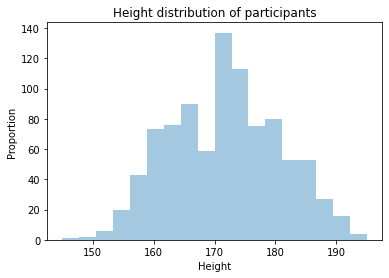

In [11]:
# Histogram
sns.distplot(df["height"], hist=True, kde=False) #No histogram
plt.title("Height distribution of participants")
plt.xlabel("Height")
plt.ylabel("Proportion")
plt.show()

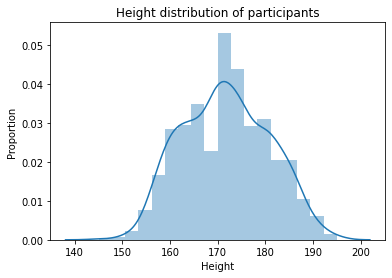

In [12]:
# Now a density plot.
sns.distplot(df["height"], hist=True, kde=True) #No histogram
plt.title("Height distribution of participants")
plt.xlabel("Height")
plt.ylabel("Proportion")
plt.show()

D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


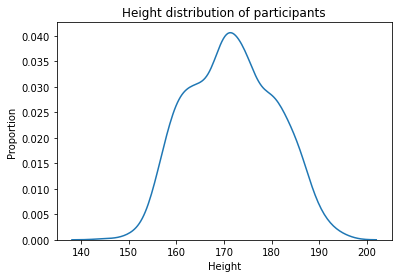

In [13]:
# Now a density plot.
sns.distplot(df["height"], hist=False, kde=True) #No histogram
plt.title("Height distribution of participants")
plt.xlabel("Height")
plt.ylabel("Proportion")
plt.show()

In [14]:
# Median and Mode calculation!

print('median: ' + str(float(df[['height']].median())))
print('mode: ' + str(df[['height']].mode()['height'][0]))

median: 172.0
mode: 170.0


In [15]:
# Even more descriptive Statistics!
df['height'].describe()

count    928.000000
mean     171.668103
std        9.080235
min      145.000000
25%      165.000000
50%      172.000000
75%      179.000000
max      195.000000
Name: height, dtype: float64

### What can we conclude from this?

- The center of the distribution is around 170-172.


- The standard deviation is about 9.1 cm


- There is no right or left skew. The distribution is symmetrical.


- The distribution is bimodal (it has two peaks). This can be clearly seen in the histogram but is obscured in the density plot, since it tries to model the data.


- The distribution is not normal (bell-shaped), but is a combination of two more or less normal distributions

## A time series


Now to create a plot of a time series, e.g. mean steps per day over all participants.

In [21]:
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean() 
mean_steps.index

Index(['20-6-2013', '21-6-2013', '22-6-2013', '23-6-2013', '24-6-2013',
       '25-6-2013', '26-6-2013', '27-6-2013', '28-6-2013', '29-6-2013',
       ...
       '4-5-2014', '5-5-2014', '6-5-2014', '7-5-2014', '8-5-2014', '9-5-2014',
       '10-5-2014', '11-5-2014', '12-5-2014', '13-5-2014'],
      dtype='object', length=328)

In [22]:
mean_steps.head

<bound method NDFrame.head of 20-6-2013     3642.416667
21-6-2013     9034.724280
22-6-2013    10889.636691
23-6-2013     7402.847973
24-6-2013     8110.370056
                 ...     
9-5-2014      9570.690141
10-5-2014     7614.848837
11-5-2014     6805.925926
12-5-2014     7505.530303
13-5-2014             NaN
Length: 328, dtype: float64>

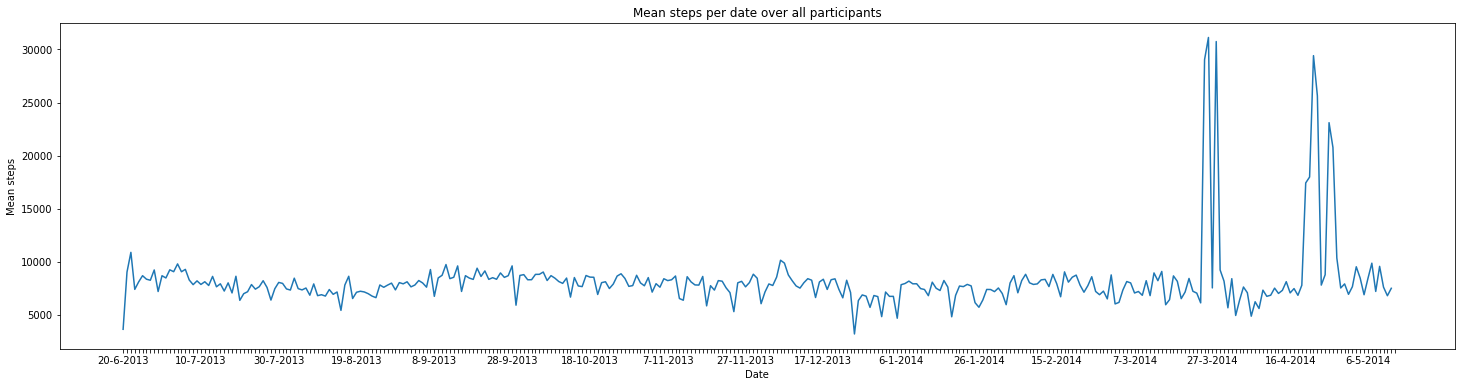

In [28]:
plt.figure(figsize=(25, 6)) #set the figure ("canvas") size
plot = sns.lineplot(x=mean_steps.index, y=mean_steps) #create the plot

#Now a tricky part. If we plot all the dates, they overlap. So we need to make some ticks invisible. 

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 20 == 0:  # every 20th label is kept
                label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Mean steps per date over all participants") #set the title
plt.xlabel("Date") #set the x-label
plt.ylabel("Mean steps") #set the y-label

plt.show() #show the plot